In [5]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from datetime import datetime

In [36]:
import open_cp

In [ ]:
def _normalise_matrix(p):
    column_sums = _np.sum(p, axis=0)
    return p / column_sums[None,:]
    
def p_matrix(points, background_kernel, trigger_kernel):
    """Computes the probability matrix.

    :param points: The (time, x, y) data
    :param background_kernel: The kernel giving the background event intensity.
    :param trigger_kernel: The kernel giving the triggered event intensity.

    :return: A matrix `p` such that `p[i][i]` is the probability event `i` is a
      background event, and `p[i][j]` is the probability event `j` is triggered
      by event `i`.
    """

    number_data_points = points.shape[-1]
    p = _np.zeros((number_data_points, number_data_points))
    for j in range(1, number_data_points):
        d = points[:, j][:,None] - points[:, :j]
        p[0:j, j] = trigger_kernel(d)
    b = background_kernel(points)
    for i in range(number_data_points):
        p[i, i] = b[i]
    return _normalise_matrix(p)

In [10]:
#get the crime data from here https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z
crime = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

crime['DATE OCC'] = crime['DATE OCC'].apply(lambda x: datetime.strptime(x,  '%m/%d/%Y %H:%M:%S %p'))
crime = crime[crime['DATE OCC'].dt.year == 2018]

df1 = crime[['LAT', 'LON']]
df1 = df1[~((df1.LAT==0)&(df1.LON==0))]

In [12]:
laurl = 'https://raw.githubusercontent.com/datadesk/geopandas-intersection-area-example/master/input/la-county-neighborhoods-v6.geojson'
hoods = gpd.read_file(laurl)



geometry = [Point(xy) for xy in zip(df1['LON'], df1['LAT'])]
gdf = GeoDataFrame(df1, geometry=geometry) 

In [13]:
hoods

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,L.A. County Neighborhood (V6),acton,Acton,acton-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': '', 'name': 'Acton', 'region': 'antel...",/1.0/boundary/acton-la-county-neighborhood-v6/,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894..."
1,L.A. County Neighborhood (V6),adams-normandie,Adams-Normandie,adams-normandie-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': 'los-angeles', 'name': 'Adams-Normand...",/1.0/boundary/adams-normandie-la-county-neighb...,"MULTIPOLYGON (((-118.30800 34.03740, -118.3006..."
2,L.A. County Neighborhood (V6),agoura-hills,Agoura Hills,agoura-hills-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': '', 'name': 'Agoura Hills', 'region':...",/1.0/boundary/agoura-hills-la-county-neighborh...,"MULTIPOLYGON (((-118.77621 34.16816, -118.7263..."
3,L.A. County Neighborhood (V6),agua-dulce,Agua Dulce,agua-dulce-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': '', 'name': 'Agua Dulce', 'region': '...",/1.0/boundary/agua-dulce-la-county-neighborhoo...,"MULTIPOLYGON (((-118.37822 34.48811, -118.3783..."
4,L.A. County Neighborhood (V6),alhambra,Alhambra,alhambra-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': '', 'name': 'Alhambra', 'region': 'sa...",/1.0/boundary/alhambra-la-county-neighborhood-v6/,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."
...,...,...,...,...,...,...,...,...
313,L.A. County Neighborhood (V6),wilmington,Wilmington,wilmington-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': 'los-angeles', 'name': 'Wilmington', ...",/1.0/boundary/wilmington-la-county-neighborhoo...,"MULTIPOLYGON (((-118.22476 33.82461, -118.2245..."
314,L.A. County Neighborhood (V6),windsor-square,Windsor Square,windsor-square-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': 'los-angeles', 'name': 'Windsor Squar...",/1.0/boundary/windsor-square-la-county-neighbo...,"MULTIPOLYGON (((-118.31359 34.07623, -118.3135..."
315,L.A. County Neighborhood (V6),winnetka,Winnetka,winnetka-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': 'los-angeles', 'name': 'Winnetka', 'r...",/1.0/boundary/winnetka-la-county-neighborhood-v6/,"MULTIPOLYGON (((-118.56231 34.23199, -118.5622..."
316,L.A. County Neighborhood (V6),woodland-hills,Woodland Hills,woodland-hills-la-county-neighborhood-v6,/1.0/boundary-set/la-county-neighborhoods-v6/,"{'city': 'los-angeles', 'name': 'Woodland Hill...",/1.0/boundary/woodland-hills-la-county-neighbo...,"MULTIPOLYGON (((-118.57644 34.18836, -118.5748..."


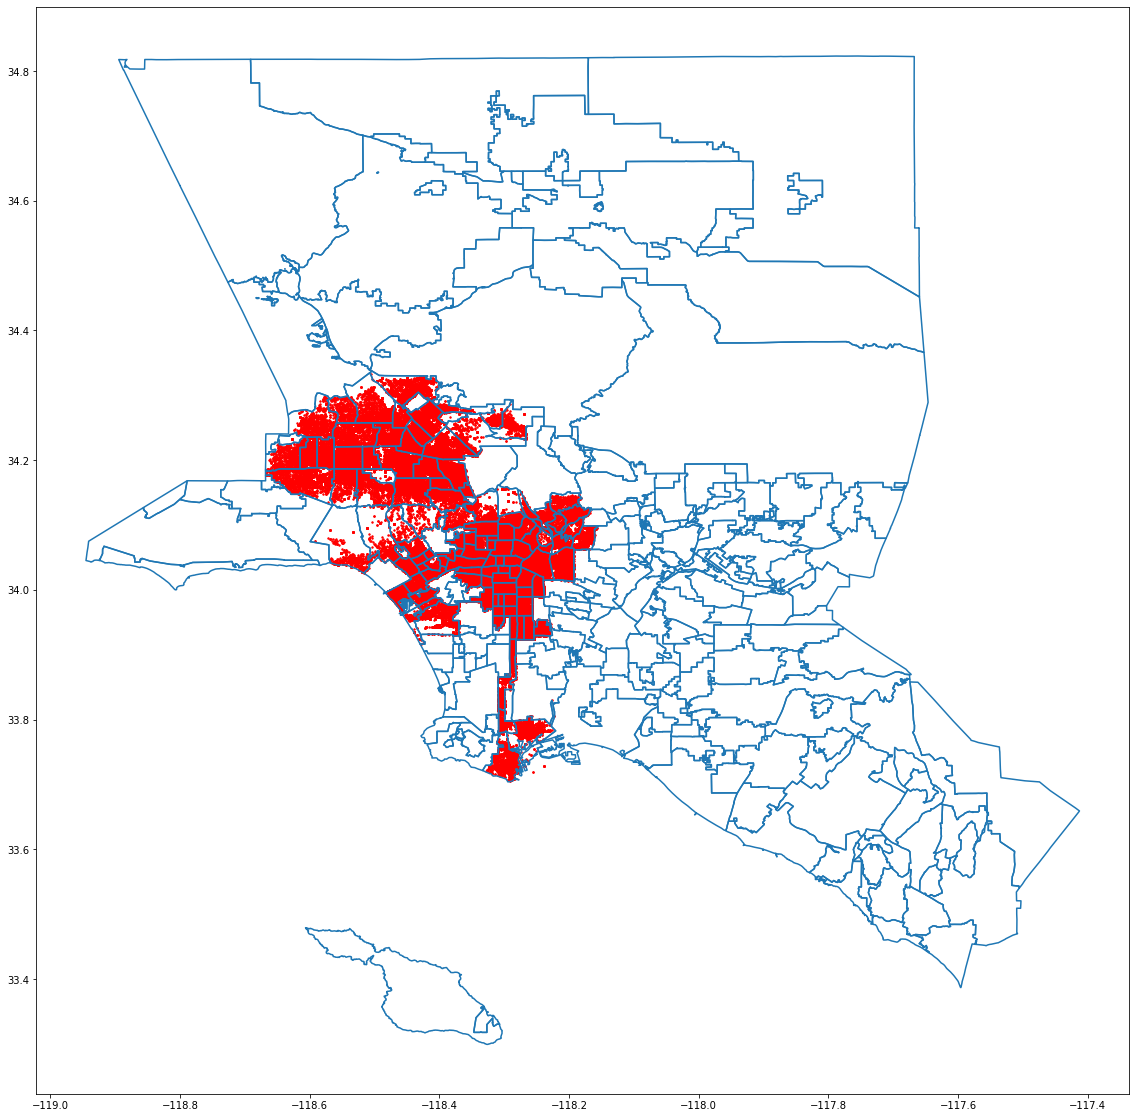

In [14]:
gdf.plot(ax=hoods.boundary.plot(figsize=(40, 20)), marker='o', color='red', markersize=2);

In [19]:
#(time, long, lat)

df = crime[['DATE OCC', 'LON', 'LAT']]

In [20]:
class ModelBase():
    """Interface for a "model".
    
    We use the convention that the data is always an array of shape `(3,N)`
    formed of `[times, x, y]` where `times` is an increasing sequence of
    numbers from 0.
    """
    
    def background(self, points):
        """Evaluate the background kernel at `points`.  If `points is of
        shape `(3,N)` then should return an array of shape `(N,)`.
        
        :return: Array of shape `(N,)`
        """
        raise NotImplementedError()
        
    def trigger(self, trigger_point, delta_points):
        """We allow quite general trigger risk kernels which can depend on the
        "trigger point" as well as the delta between the trigger and triggered
        events.
        
        :param trigger_point: Array of shape `(3,)` specifying the `(t, x, y)`
          coords of the (single) trigger event.
        :param delta_points: Array of shape `(3,m)` specifying the deltas to
          the triggered events.  Add to `trigger_point` to get the absolute
          location of the triggered events.
          
        :return: Array of shape `(m,)`
        """
        raise NotImplementedError()
        
    def log_likelihood_base(self, points):
        """Computes the non-normalised log likelihood,
        :math:`\sum_{i=1}^n \log \lambda^*(t_i,x_i,y_i)`.
        The normalisation requires integrating which is best left to a concrete
        subclass.
        """
        points = _np.asarray(points)
        out = 0.0
        for i in range(points.shape[1]):
            pt = points[:,i]
            ptt = pt[:,None]
            li = self.background(ptt)[0]
            deltas = ptt - points[:,:i]
            li += _np.sum(self.trigger(pt, deltas))
            out += _np.log(li)
        return out

In [ ]:
# grid 
xsize = 250
ysize = 250
xoffset = 0
yoffset = 0

open_cp.data.Grid(xsize=xsize, ysize=ysize, xoffset=xoffset, yoffset=yoffset)
open_cp.geometry.mask_grid_by_intersection(get_side(side), grid)

In [37]:
open_cp.data.TimedPoints.from_coords(df['DATE OCC'], df['LON'], df['LAT'])

In [60]:
import open_cp.sepp as sepp

In [61]:

my_points = list(df.itertuples(index=False, name=None))

In [67]:
my_points = open_cp.data.TimedPoints.from_coords(df['DATE OCC'], df['LON'], df['LAT'])

In [68]:
trainer = sepp.SEPPTrainer()
trainer.data = my_points

In [70]:
trainer = sepp.SEPPTrainer()
trainer.data = my_points
predictor = trainer.train(iterations=40)

In [69]:
sd = trainer.make_stocastic_decluster()
sd.initial_time_bandwidth = 10000
p = sd.initial_p_matrix()
backgrounds, aftershocks = sepp.sample_points(sd.points, p)

KeyboardInterrupt: 

In [28]:
import open_cp.sources.sepp as source_sepp
process = source_sepp.SelfExcitingPointProcess(
    background_sampler = source_sepp.HomogeneousPoissonSampler(rate=0.1),
    trigger_sampler = source_sepp.ExponentialDecaySampler(intensity=0.5, exp_rate=0.05))

In [30]:
process.sample_with_details(min(df['DATE OCC']), max(df['DATE OCC']))

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [26]:
(max(df['DATE OCC'])-min(df['DATE OCC']))

Timedelta('364 days 00:00:00')

In [ ]:
def p_matrix_col(points, col, theta=0.5, omega=0.05, mu=0.1):
    p = np.empty(col + 1)
    p[col] = mu
    dt = points[col] - points[0:col]
    p[0:col] = theta * omega * np.exp(-omega * dt)
    return p, np.sum(p), dt

def m_step(points, total_time, theta=0.5, omega=0.05, mu=0.1):
    omega_1, omega_2, mu_e = 0.0, 0.0, 0.0
    for col in range(len(points)):
        p, norm, dt = p_matrix_col(points, col, theta, omega, mu)
        wp = p[0:col] * dt
        omega_1 += np.sum(p[0:col]) / norm
        omega_2 += np.sum(wp) / norm
        mu_e += p[-1] / norm

    return omega_1 / len(points), omega_1 / omega_2, mu_e / total_time

theta, omega, mu = m_step(points, total_time)
theta, omega, mu